<a href="https://colab.research.google.com/github/Zkeera/Project-Machine-Learning-Terapan/blob/main/Machine_Learning_Terapan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Menginput seluruh library

Pada tahap ini, kita mengimpor berbagai library yang akan digunakan untuk analisis data, visualisasi, dan pemodelan machine learning.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset

Membaca dataset AirQualityUCI.csv. Dataset ini berisi informasi tentang kualitas udara dari sensor di Italia, dengan lebih dari 900 sampel data.

In [13]:
url = 'https://docs.google.com/spreadsheets/d/1ag1VUt7aWwmJ9enyUBaqR4ZtivUNcEQMemrasQ-IedU/export?format=csv'
df = pd.read_csv(url)
df.shape

(9357, 15)

# Data Understanding

Melihat 5 data pertama, tipe data, dan statistik deskriptif untuk memahami struktur dan karakteristik data.

Jumlah data awal adalah 9357 baris dan 15 kolom. Hal ini sesuai dengan hasil dari fungsi `.shape` pada dataframe sebelum dilakukan pembersihan.

In [14]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           9357 non-null   object
 1   Time           9357 non-null   object
 2   CO(GT)         9357 non-null   object
 3   PT08.S1(CO)    9357 non-null   int64 
 4   NMHC(GT)       9357 non-null   int64 
 5   C6H6(GT)       9357 non-null   object
 6   PT08.S2(NMHC)  9357 non-null   int64 
 7   NOx(GT)        9357 non-null   int64 
 8   PT08.S3(NOx)   9357 non-null   int64 
 9   NO2(GT)        9357 non-null   int64 
 10  PT08.S4(NO2)   9357 non-null   int64 
 11  PT08.S5(O3)    9357 non-null   int64 
 12  T              9357 non-null   object
 13  RH             9357 non-null   object
 14  AH             9357 non-null   object
dtypes: int64(8), object(7)
memory usage: 1.1+ MB


,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


# Data Cleaning

Pada tahap ini dilakukan pembersihan data dengan:
- Menghapus dua kolom terakhir ('RH' dan 'AH') dari dataframe yang telah dimuat, karena kolom ini tidak relevan terhadap target prediksi dan tidak memiliki nilai yang informatif.
- Menghapus nilai-nilai yang tidak valid, seperti -200, yang merupakan indikator data hilang pada dataset ini.

In [15]:
# Drop kolom yang tidak relevan (misalnya kolom terakhir kosong)
df = df.iloc[:, :-2]

# Ganti nilai -200 sebagai missing value
df.replace(-200, np.nan, inplace=True)

# Drop baris yang memiliki missing value
df.dropna(inplace=True)

df.shape

(851, 13)

# Exploratory Data Analysis (EDA)

Grafik berikut menunjukkan korelasi antar fitur dalam dataset. Hal ini membantu dalam memilih variabel yang relevan untuk pemodelan.

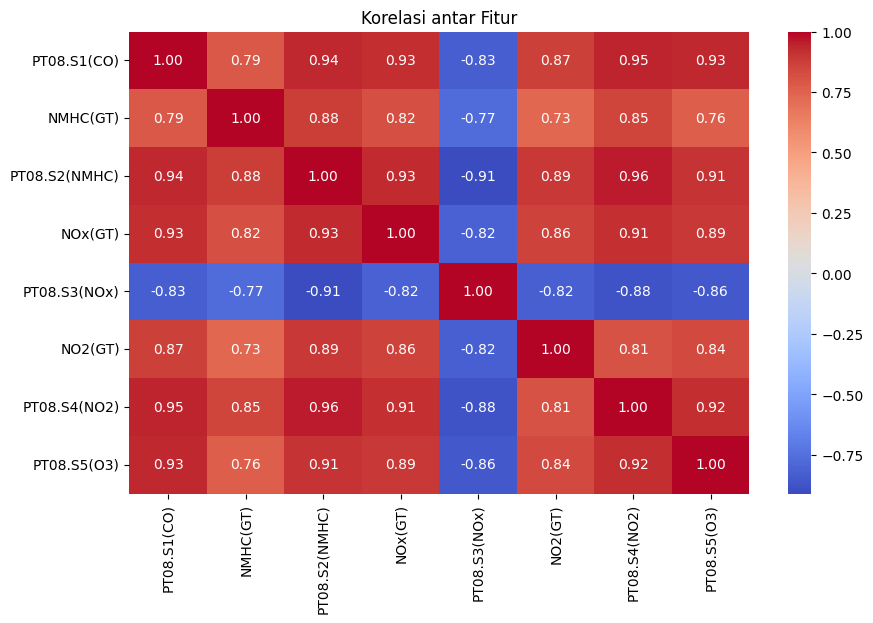

In [16]:
# Ambil hanya kolom numerik
numeric_df = df.select_dtypes(include=[np.number])

# Tampilkan heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasi antar Fitur")
plt.show()

# Feature and Target Separation

Memilih fitur dan target. Target prediksi adalah konsentrasi Benzene (C6H6(GT)), yang merupakan indikator kualitas udara.

In [17]:
X = df[["CO(GT)", "PT08.S1(CO)", "PT08.S2(NMHC)", "PT08.S3(NOx)", "T"]]
y = df["C6H6(GT)"]

# Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scalling

Melakukan normalisasi fitur agar model dapat belajar lebih optimal

In [19]:
# Ganti koma dengan titik di seluruh dataframe
X_train = X_train.replace(',', '.', regex=True)
X_test = X_test.replace(',', '.', regex=True)
y_train = y_train.replace(',', '.', regex=True)
y_test = y_test.replace(',', '.', regex=True)

# Konversi semua kolom menjadi float
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)


# Lakukan scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

Melatif model Random Forest Regressor dengan data training

Random Forest Regressor bekerja dengan membangun banyak decision tree secara paralel pada subset data training. Setiap tree memberikan prediksi dan hasil akhirnya adalah rata-rata dari semua tree. Algoritma ini kuat terhadap overfitting dan mampu menangani data dengan fitur yang kompleks.

Parameter yang digunakan dalam model ini adalah:
- `n_estimators=100`: Jumlah pohon keputusan.
- `random_state=42`: Seed untuk menghasilkan hasil yang konsisten.

In [20]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

# Evaluasi Model

Mengevaluasi performa model menggunakan metrik Mean Squared Error dan R-squared. Nilai R² mendekati 1 menunjukkan bahwa model memiliki performa prediksi yang baik.

In [21]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

MSE: 0.004367257309941249
R2 Score: 0.999916273033854


In [22]:
# Menampilkan feature importance
importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Fitur': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Fitur,Importance
2,PT08.S2(NMHC),0.999184
1,PT08.S1(CO),0.000327
0,CO(GT),0.000309
3,PT08.S3(NOx),0.000101
4,T,0.000079


Berdasarkan hasil feature importance dari model Random Forest, kita dapat melihat fitur-fitur yang paling berkontribusi terhadap peningkatan kadar Benzene. Fitur dengan nilai 'importance' tertinggi adalah yang paling berpengaruh. Dari hasil ini, kita dapat menyimpulkan fitur lingkungan utama yang mempengaruhi kadar Benzene di udara.